In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn
import math

In [2]:
dataHD = pd.read_csv("C:/Users/talno/microbiom_project/cleaned_microbiomeHD_versionA")
dataAmericans = pd.read_csv("C:/Users/talno/microbiom_project/cleaned_AmericansversionA")

C:\Users\talno\AppData\Local\Temp\ipykernel_19920\4025485887.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataAmericans = pd.read_csv("C:/Users/talno/microbiom_project/cleaned_AmericansversionA")


In [3]:
dataHD.drop(columns='Unnamed: 0', inplace=True)
dataAmericans.drop(columns='Unnamed: 0', inplace=True)

In [4]:
keep_features = [i for i in dataHD.columns if i in dataAmericans.columns]
n = len(keep_features)
print("features left: ", n)

features left:  139


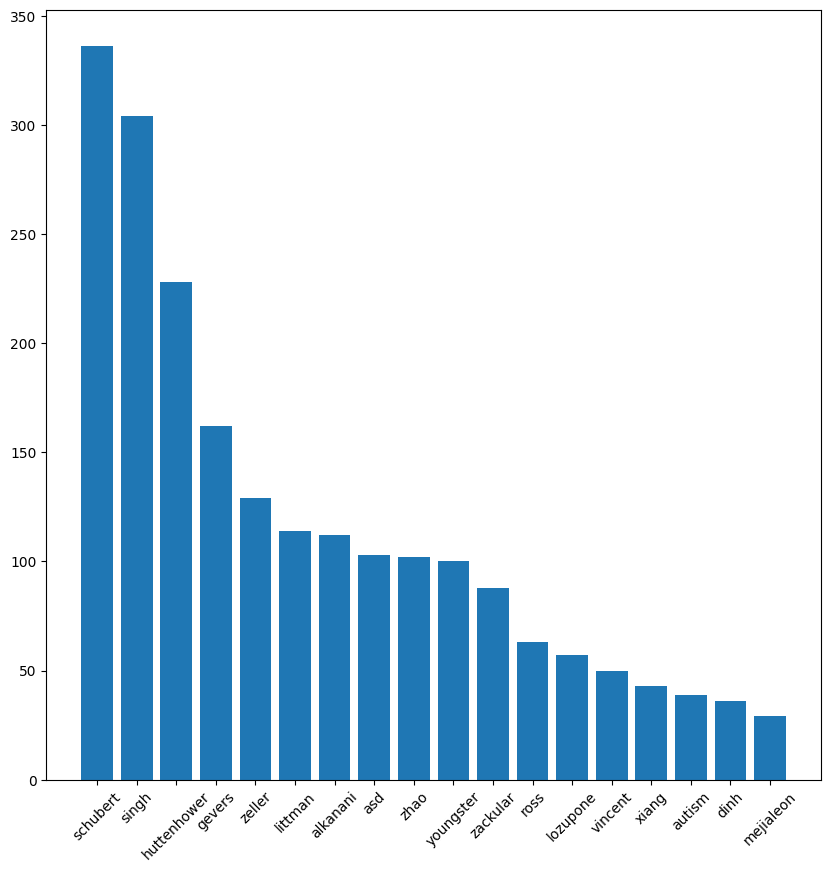

In [58]:

fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(np.arange(0, len(dataHD.From.value_counts())), dataHD.From.value_counts())
plt.xticks(np.arange(0, len(dataHD.From.value_counts())), list(dataHD.From.value_counts().keys()), rotation=45)
plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/samples_number.png')


In [5]:
dataHD_filtered = dataHD.loc[:,keep_features]
dataAmericans_filtered = dataAmericans.loc[:,keep_features]
print(dataAmericans_filtered.shape, dataHD_filtered.shape)


(9509, 139) (2095, 139)


In [ ]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
plt.figure()
plt.xticks(range(n), keep_features)
plt.yticks(range(len(dataHD_filtered)))
plt.title('HD')
plot = seaborn.heatmap(-np.log(dataHD_filtered.values), cmap="Blues")
# plt.show()
plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/HD_headtmap.png')


In [ ]:
plt.figure()
plt.xticks(range(n), keep_features, rotation=90)
plt.yticks(range(len(dataAmericans_filtered)))
plt.title('american')
plot = seaborn.heatmap(-np.log(dataAmericans_filtered.values), cmap="Blues")
plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/Americans_headtmap.png')

In [ ]:
plt.bar(np.arange(0, len(dataHD_filtered)), list(dataHD_filtered.sum(axis=1)))
plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/Remaining_percentage_after_filter.png')

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

#create data
x = np.arange(0, len(dataHD_filtered))
y = np.array(list(dataHD_filtered.sum(axis=1)))

plt.fill_between(x, y,0, alpha=1)
plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/Remaining_percentage_after_filter2.png')


In [6]:
all_data = pd.concat([dataAmericans_filtered, dataHD_filtered])

In [7]:
pca = PCA(n_components=2)
pca.fit(dataAmericans_filtered)
components_americans1 = pca.transform(dataAmericans_filtered)
components_HD1 = pca.transform(dataHD_filtered)
print("explained variance: ", pca.explained_variance_ratio_)
pca_americans1 = pd.DataFrame(data= components_americans1, columns= ['Pc1', 'Pc2'])
pca_HD1 = pd.DataFrame(data= components_HD1, columns= ['Pc1', 'Pc2'])


explained variance:  [0.38643033 0.14631096]


In [8]:
pca = PCA(n_components=2)
pca.fit(all_data)
components_americans2 = pca.transform(dataAmericans_filtered)
components_HD2 = pca.transform(dataHD_filtered)
print("explained variance: ", pca.explained_variance_ratio_)
pca_americans2 = pd.DataFrame(data= components_americans2, columns= ['Pc1', 'Pc2'])
pca_HD2 = pd.DataFrame(data= components_HD2, columns= ['Pc1', 'Pc2'])

explained variance:  [0.48445384 0.10461272]


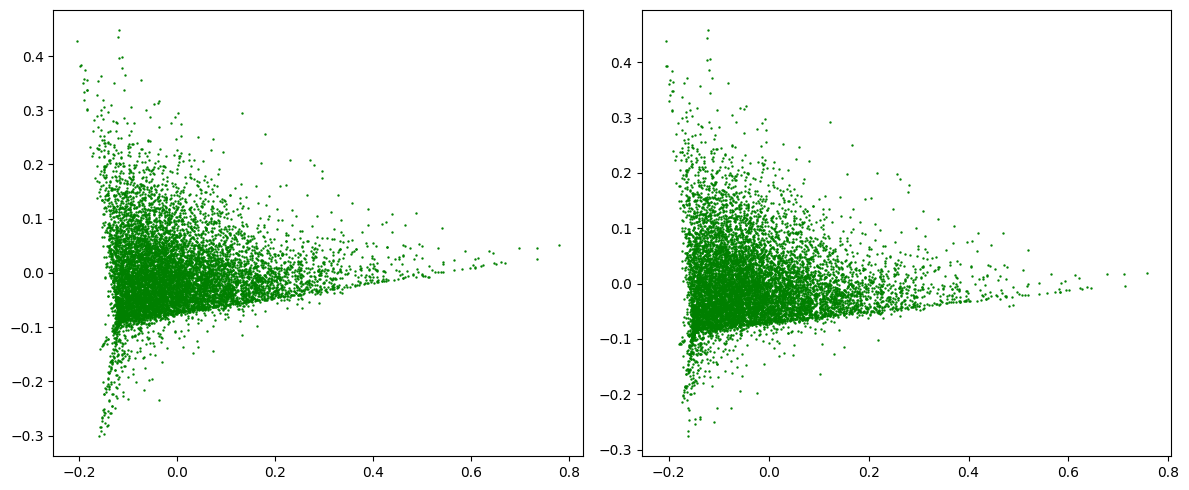

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].scatter(pca_americans1.loc[:,'Pc1'], pca_americans1.loc[:,'Pc2'],marker='.',s=2, color= 'g')
axes[1].scatter(pca_americans2.loc[:,'Pc1'], pca_americans2.loc[:,'Pc2'],marker='.',s=2, color= 'g')
fig.tight_layout()
plt.savefig('C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/figures/americans_pca_vs_all_pca.png')
plt.show()

In [29]:
dataAmericans

,f__Acetivibrionaceaeg__,f__Acetobacteraceaeg__Roseomonas,f__Acidaminococcaceaeg__,f__Acidaminococcaceaeg__Acidaminococcus,f__Acidaminococcaceaeg__Phascolarctobacterium,f__Acidaminococcaceaeg__Phascolarctobacterium_A,f__Acidaminococcaceaeg__Succiniclasticum,f__Actinomycetaceaeg__,f__Actinomycetaceaeg__Actinobaculum,f__Actinomycetaceaeg__Actinomyces,...,f__Weeksellaceaeg__Cloacibacterium,f__Weeksellaceaeg__Epilithonimonas,f__Weeksellaceaeg__JABCPE02,f__X112g__HOT-345,f__Xanthobacteraceaeg__Bradyrhizobium,f__Xanthomonadaceaeg__,f__Xanthomonadaceaeg__Luteimonas,f__Xanthomonadaceaeg__Pseudoxanthomonas_A,f__Xanthomonadaceaeg__Stenotrophomonas,f__Xanthomonadaceaeg__Xanthomonas
0,0.0,0.0,0.0,0.0,0.002088,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.008133,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.039333,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504,0.0,0.0,0.0,0.0,0.000000,0.003717,0.0,0.0,0.0,0.000000,...,0.000885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9505,0.0,0.0,0.0,0.0,0.000000,0.032123,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9506,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9507,0.0,0.0,0.0,0.0,0.000437,0.000000,0.0,0.0,0.0,0.000125,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pca = PCA(n_components=2)
pca.fit()
components_americans2 = pca.transform(dataAmericans_filtered)
components_HD2 = pca.transform(dataHD_filtered)
print("explained variance: ", pca.explained_variance_ratio_)
pca_americans2 = pd.DataFrame(data= components_americans2, columns= ['Pc1', 'Pc2'])
pca_HD2 = pd.DataFrame(data= components_HD2, columns= ['Pc1', 'Pc2'])

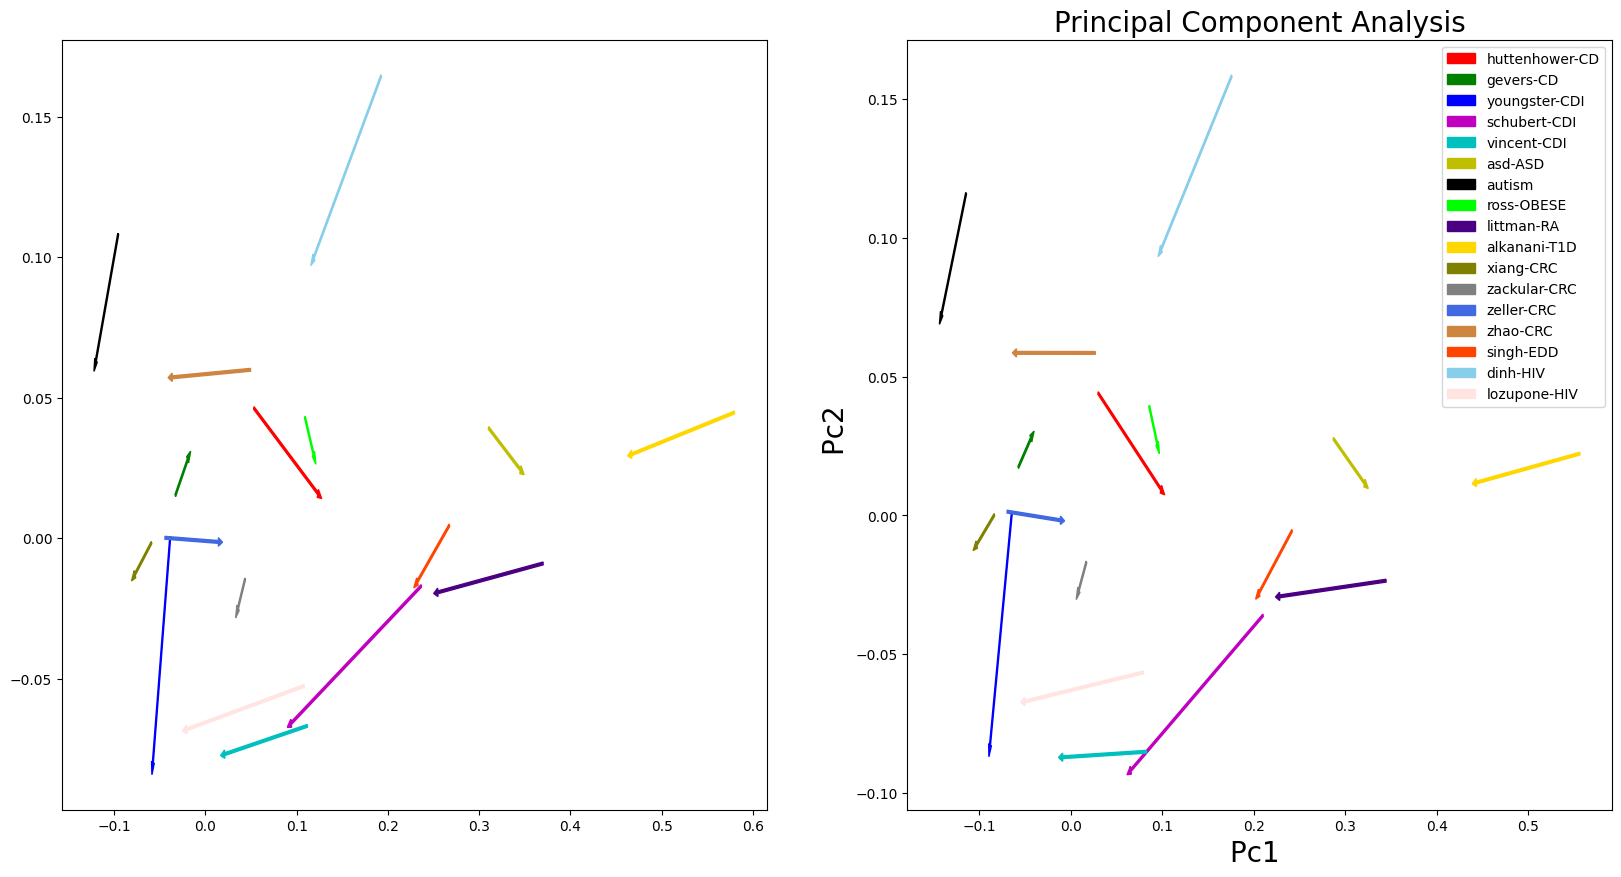

In [102]:
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
itr = [pca_HD1, pca_HD2]
for i, pca_HD in enumerate(itr):
    plt.xlabel('Pc1 ', fontsize=20)
    plt.ylabel('Pc2 ', fontsize=20)
    plt.title("Principal Component Analysis",fontsize=20)

    targets = [["huttenhower", "H"],["huttenhower", "D"], ["gevers", "H"],["gevers", "D"], ["youngster", "H"],["youngster", "D"], ["schubert", "H"],["schubert", "D"],["vincent", "H"],["vincent", "D"],["asd", "H"],["asd", "D"],["autism", "H"],["autism", "D"],["ross", "H"],["ross", "D"],["littman", "H"],["littman", "D"],["alkanani", "H"],["alkanani", "D"],["xiang", "H"],["xiang", "D"],["zackular", "H"],["zackular", "D"],["zeller", "H"],["zeller", "D"],["zhao", "H"],["zhao", "D"],["singh", "H"],["singh", "D"],["dinh", "H"],["dinh", "D"],["lozupone", "H"],["lozupone", "D"]]
    how_many = []
    colors = ['r', 'r', 'g', 'g', 'b', 'b','m', 'm', 'c', 'c','y','y','k','k','lime','lime','indigo','indigo','gold','gold','olive','olive','grey','grey','royalblue','royalblue','peru','peru','orangered','orangered','skyblue','skyblue','mistyrose','mistyrose']
    arrows = []
    # axes[i].scatter(pca_americans1.loc[:,'Pc1'], pca_americans1.loc[:,'Pc2'],marker='.',s=2, color= 'g')
    for target, color in zip(targets,colors):
        indicesToKeep = (dataHD['From'] == target[0]) & (dataHD['DiseaseState'] == target[1])
        fill = 'none'
        if target[1] == "D":
            fill = color
        x = pca_HD.loc[indicesToKeep.values, 'Pc1'].values.mean()
        y = pca_HD.loc[indicesToKeep.values, 'Pc2'].values.mean()
        arrows.append(x)
        arrows.append(y)
        # axes[i].scatter(pca_HD.loc[indicesToKeep.values, 'Pc1'] , pca_HD.loc[indicesToKeep.values, 'Pc2'], c=fill, edgecolors=color, s=50)
    # find centroids and plotting an arrow
    col = ['r', 'g', 'b', 'm', 'c','y','k','lime','indigo','gold','olive','grey','royalblue','peru','orangered','skyblue','mistyrose']
    for j in range(0,len(arrows),4):
        axes[i].arrow(arrows[j], arrows[j+1], arrows[j+2]-arrows[j],arrows[j+3]-arrows[j+1], color=col[j//4])
    L = ["huttenhower-CD", "gevers-CD", "youngster-CDI", "schubert-CDI","vincent-CDI","asd-ASD","autism","ross-OBESE","littman-RA","alkanani-T1D","xiang-CRC","zackular-CRC","zeller-CRC","zhao-CRC","singh-EDD","dinh-HIV","lozupone-HIV"]
    plt.legend(L) 
# fig.show()

In [142]:
disease = ["CD","CDI","autism", "Obese", "RA","T1D","CRC","EDD","HIV"]
disease_map = {"CD":["huttenhower", "gevers", "N", "N"],"CDI":["youngster", "schubert","vincent", "N"],"autism":['asd', 'autism', "N", "N"], "Obese":['ross', "N", "N", "N"], "RA":['littman', "N", "N", 'N'],"T1D":['alkanani', "N", "N", 'N'],"CRC":["xiang","zackular","zeller","zhao"],"EDD":['singh', "N", "N", "N"],"HIV":['dinh',"lozupone", "N", "N"]}


[('huttenhower', 'huttenhower'), ('gevers', 'gevers'), ('N', 'N'), ('N', 'N')]

In [167]:
def pca_disease(disease):
    arrows = []
    data_partial = dataHD[(dataHD['From'] == disease_map[disease][0]) | (dataHD['From'] == disease_map[disease][1]) | (dataHD['From'] == disease_map[disease][2]) | (dataHD['From'] == disease_map[disease][3])]
    keep_features = [i for i in data_partial.columns if i in dataAmericans.columns and data_partial[i].sum() > 0.1] 
    print(len(keep_features))  
    data_filtered = data_partial.loc[:,keep_features]
    dataAmericans_filtered = dataAmericans.loc[:,keep_features]     
    pca = PCA(n_components=2)
    pca.fit(pd.concat([dataAmericans_filtered, data_filtered]))
    components_americans = pca.transform(dataAmericans_filtered)
    components_disease = pca.transform(data_filtered)
    print("explained variance: ", pca.explained_variance_ratio_)
    pca_americans = pd.DataFrame(data= components_americans, columns= ['Pc1', 'Pc2'])
    pca_disease = pd.DataFrame(data= components_disease, columns= ['Pc1', 'Pc2'])  
    
    plt.xlabel('Pc1 ', fontsize=10)
    plt.ylabel('Pc2 ', fontsize=10)
    plt.title("Principal Component Analysis",fontsize=20)
    targets = disease_map[disease]
    colors = ['r','c', 'b','lime']
    plt.scatter(pca_americans.loc[:,'Pc1'], pca_americans.loc[:,'Pc2'],marker='.',s=2, color= 'g')
    for target, color in zip(targets,colors):
        indicesToKeep = (data_partial['From'] == target) & (data_partial['DiseaseState'] == 'H')
        x = pca_disease.loc[indicesToKeep.values, 'Pc1'].values.mean()
        y = pca_disease.loc[indicesToKeep.values, 'Pc2'].values.mean()
        arrows.append(x)
        arrows.append(y)  
        # plt.scatter(pca_disease.loc[indicesToKeep.values, 'Pc1'] , pca_disease.loc[indicesToKeep.values, 'Pc2'], c=color, edgecolors=color, s=50)
        indicesToKeep = (data_partial['From'] == target) & (data_partial['DiseaseState'] == 'D')
        x = pca_disease.loc[indicesToKeep.values, 'Pc1'].values.mean()
        y = pca_disease.loc[indicesToKeep.values, 'Pc2'].values.mean()
        arrows.append(x)
        arrows.append(y)  
        # plt.scatter(pca_disease.loc[indicesToKeep.values, 'Pc1'] , pca_disease.loc[indicesToKeep.values, 'Pc2'], c='none', edgecolors=color, s=50)
    
    # find centroids and plotting an arrow
    col = ['r', 'c', 'b', 'lime']
    for j in range(0,len(arrows),4):
        plt.arrow(arrows[j], arrows[j+1], arrows[j+2]-arrows[j],arrows[j+3]-arrows[j+1], color=col[j//4])
    # plt.legend(L) 
    fig.show() 

                              

In [ ]:
pca_disease("CD")

In [104]:
data_CDI = dataHD[(dataHD['From'] == 'youngster') | (dataHD['From'] =='schubert') | (dataHD['From'] == 'vincent')]

In [117]:
keep_features_cdi = [i for i in data_CDI.columns if i in dataAmericans.columns and data_CDI[i].sum() > 0.1]

In [120]:
dataCDI_filtered = dataHD.loc[:,keep_features_cdi]
dataAmericans_filtered = dataAmericans.loc[:,keep_features_cdi]
print(dataAmericans_filtered.shape, dataCDI_filtered.shape)

(9509, 45) (2095, 45)


In [129]:
pca = PCA(n_components=2)
pca.fit(dataAmericans_filtered)
components_americans2 = pca.transform(dataAmericans_filtered)
components_CDI = pca.transform(dataCDI_filtered)
print("explained variance: ", pca.explained_variance_ratio_)
pca_americans2 = pd.DataFrame(data= components_americans2, columns= ['Pc1', 'Pc2'])
pca_CDI = pd.DataFrame(data= components_HD2, columns= ['Pc1', 'Pc2'])

explained variance:  [0.4980089  0.18224737]


C:\Users\talno\AppData\Local\Temp\ipykernel_19920\884203007.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


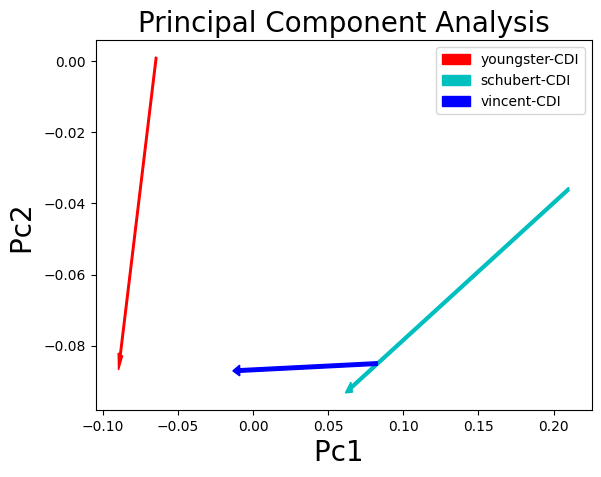

In [139]:
plt.xlabel('Pc1 ', fontsize=20)
plt.ylabel('Pc2 ', fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = [["youngster", "H"],["youngster", "D"], ["schubert", "H"],["schubert", "D"],["vincent", "H"],["vincent", "D"]]
how_many = []
colors = ['r', 'r', 'c', 'c', 'b', 'b']
arrows = []
# plt.scatter(pca_americans1.loc[:,'Pc1'], pca_americans1.loc[:,'Pc2'],marker='.',s=2, color= 'g')
for target, color in zip(targets,colors):
    indicesToKeep = (dataHD['From'] == target[0]) & (dataHD['DiseaseState'] == target[1])
    fill = 'none'
    if target[1] == "D":
        fill = color
    x = pca_CDI.loc[indicesToKeep.values, 'Pc1'].values.mean()
    y = pca_CDI.loc[indicesToKeep.values, 'Pc2'].values.mean()
    arrows.append(x)
    arrows.append(y)
    # plt.scatter(pca_CDI.loc[indicesToKeep.values, 'Pc1'] , pca_CDI.loc[indicesToKeep.values, 'Pc2'], c=fill, edgecolors=color, s=50)
# find centroids and plotting an arrow
col = ['r', 'c', 'b']
for j in range(0,len(arrows),4):
    plt.arrow(arrows[j], arrows[j+1], arrows[j+2]-arrows[j],arrows[j+3]-arrows[j+1], color=col[j//4])
L = ["youngster-CDI", "schubert-CDI","vincent-CDI"]
plt.legend(L) 
fig.show()

In [ ]:
dataAmericans

In [ ]:
#american clean
start = "C:/Users/talno/microbiom_project/american_gut/"
data_americans = pd.read_csv(start + "feature_table_gtdb.tsv", sep='\t')
data_americans.drop('ID',inplace=True, axis=1)
data_americans["taxon1"] = data_americans['taxon'].str.split(';', expand=True)[5]
data_americans["taxon2"] = data_americans['taxon'].str.split(';', expand=True)[4]
data_americans = data_americans.groupby(['taxon2', 'taxon1']).sum()
data_americans = data_americans/data_americans.sum(axis=0)
data_americans.fillna(0,inplace=True)
data_americans = data_americans.T

In [ ]:
ibd_huttenhower = pd.read_csv("C:/Users/talno/microbiom_project/ibd_huttenhower_results/RDP/ibd_huttenhower.otu_table.100.denovo.rdp_assigned",sep='\t')
meta_huttenhower = pd.read_csv("C:/Users/talno/microbiom_project/ibd_huttenhower_results/ibd_huttenhower.metadata.txt",sep='\t')
# arrange the otu with disease state and where from and take just what appears in the meta data
def clean(meta,ibd,name):
    
    otu = ibd.copy()
    otu["taxon_g"] = otu["Unnamed: 0"].str.split(';', expand=True)[5]
    otu["taxon_f"] = otu["Unnamed: 0"].str.split(';', expand=True)[4]
    otu = otu.groupby(["taxon_f", "taxon_g"]).sum()
    try:
        otu.drop(('f__', 'g__'), inplace=True)
    except Exception:
        print("no g__, f__")
    otu = otu /otu.sum(axis = 0)
    otu.fillna(0,inplace=True)
    otu = otu.T
    meta.set_index("#SampleID", inplace=True)
    keepsmpls = [i for i in otu.index if i in meta.index]
    otu = otu.loc[keepsmpls]
    meta = meta.loc[keepsmpls]
    otu = otu.join(meta.DiseaseState)
    otu.loc[:, "DiseaseState"] = otu.loc[:, "DiseaseState"].map(
        {"ASD": "D", "nonCDI": "H", "nonIBD": "H", "CD": "D", "UC": "D", "CDI": "D", "H": "H", "postFMT_CDI": "H",
         "ASD": "D", 'HIV': "D", 'EDD': "D", "CRC": 'D', 'OB': "D", 'PAR': "D", "OW": "D", "CIRR": "D", "MHE": "D",
         "nonCRC": "H", "RA": "D", "T1D": "D", "CRC": "D"})
    otu["From"] = name
    # print(otu.shape, name,otu[otu["DiseaseState"] == "H"].shape,otu[otu["DiseaseState"] == "D"].shape)
    return otu

otu = clean(meta_huttenhower, ibd_huttenhower, "hutt")

In [ ]:
otu.sum(axis=1)

In [ ]:
data_americans.columns = data_americans.columns.get_level_values(1)

In [ ]:
data_americans

In [ ]:
data = pd.read_csv("C:/Users/talno/microbiom_project/microbiome_dysbiosis/microbiome_dysbiosis/clean_concat_microbiomeHD")

In [ ]:
data.set_index("Unnamed: 0", inplace=True)

In [ ]:
data.columns